# LST PREDICTIONS WITH HELP OF AIR POLLUTANTS

This project uses satellite-derived air pollutants (AOD, NO₂, CO, O₃) to predict Land Surface Temperature (LST) in Noida and using machine learning model- Random Forest Regressor. Data was collected from Google Earth Engine for multiple years (2018, 2021, 2024) and seasons (summer, winter), and preprocessed using Python (Pandas, Sklearn).

In [50]:
import numpy as np
import pandas as pd

## Load Dataset

In [2]:
df=pd.read_csv('LST.csv')

In [3]:
df.head()

,Year,Season,AOD,CO,NO2,O3,LST
0,2018,Winter,-0.424806,0.043344,0.000228,0.115029,23.535808
1,2018,Winter,-0.462145,0.043404,0.000234,0.115158,25.415719
2,2018,Winter,-0.321403,0.045138,0.000324,0.115436,25.832718
3,2018,Winter,-0.545578,0.041898,0.000234,0.115300,22.992343
4,2018,Winter,-0.523436,0.042641,0.000241,0.115381,24.810730


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    1000 non-null   int64  
 1   Season  1000 non-null   object 
 2   AOD     1000 non-null   float64
 3   CO      1000 non-null   float64
 4   NO2     1000 non-null   float64
 5   O3      1000 non-null   float64
 6   LST     1000 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB


In [5]:
df.describe()

,Year,AOD,CO,NO2,O3,LST
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2021.600000,-0.068956,0.043478,0.000165,0.125757,32.079989
std,2.246118,0.388557,0.001919,0.000053,0.006361,7.824722
min,2018.000000,-0.661718,0.039615,0.000097,0.114324,21.888323
25%,2021.000000,-0.523348,0.041841,0.000121,0.123660,25.585424
50%,2021.000000,0.137581,0.043484,0.000150,0.126394,28.042468
75%,2024.000000,0.274019,0.044951,0.000198,0.129703,39.237053
max,2024.000000,0.462432,0.047487,0.000337,0.134360,51.402925


In [6]:
df.isnull().sum()

Year      0
Season    0
AOD       0
CO        0
NO2       0
O3        0
LST       0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Train-test-split

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=42)

In [61]:
X_train.sample(5)

,Year,Season,AOD,CO,NO2,O3
991,2024,Winter,0.113276,0.045829,0.000159,0.123683
616,2024,Summer,0.325429,0.044018,0.000147,0.134177
403,2021,Winter,0.202391,0.045178,0.000169,0.126665
141,2018,Winter,-0.552105,0.041783,0.000139,0.114740
630,2024,Summer,0.352680,0.042349,0.000112,0.133571


In [51]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [57]:
Y_train = ss.fit_transform(Y_train.reshape(-1, 1))
Y_test = ss.transform(Y_test.reshape(-1, 1))

## Encoding

In [58]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

In [59]:
season_encoded_train = ohe.fit_transform(X_train[['Season']])

KeyError: "None of [Index(['Season'], dtype='object')] are in the [columns]"

In [ ]:
season_df_train = pd.DataFrame(season_encoded_train, columns=ohe.get_feature_names_out(['Season']), index=X_train.index)
X_train = X_train.drop('Season', axis=1).join(season_df_train)

In [ ]:
season_encoded_test = ohe.transform(X_test[['Season']])
season_df_test = pd.DataFrame(season_encoded_test, columns=ohe.get_feature_names_out(['Season']), index=X_test.index)
X_test = X_test.drop('Season', axis=1).join(season_df_test)

## Variations of features

In [23]:
import seaborn as sns

<Axes: xlabel='AOD', ylabel='LST'>

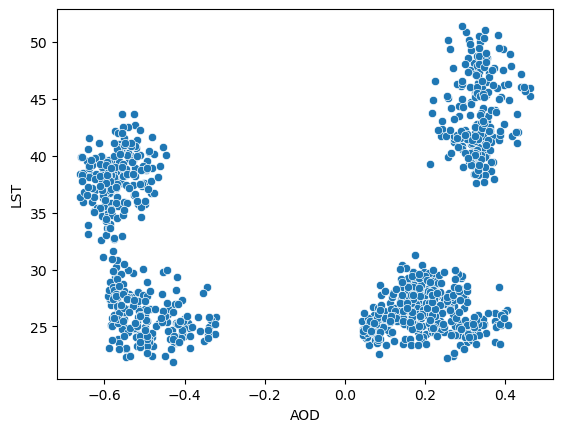

In [24]:
sns.scatterplot(x=df['AOD'],y=df['LST'])

<Axes: xlabel='CO', ylabel='LST'>

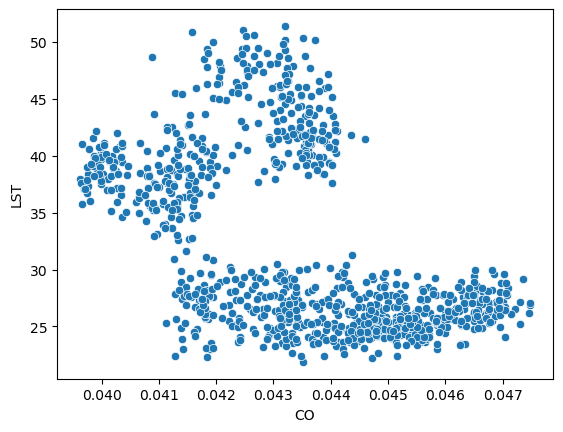

In [25]:
sns.scatterplot(x=df['CO'],y=df['LST'])

<Axes: xlabel='NO2', ylabel='LST'>

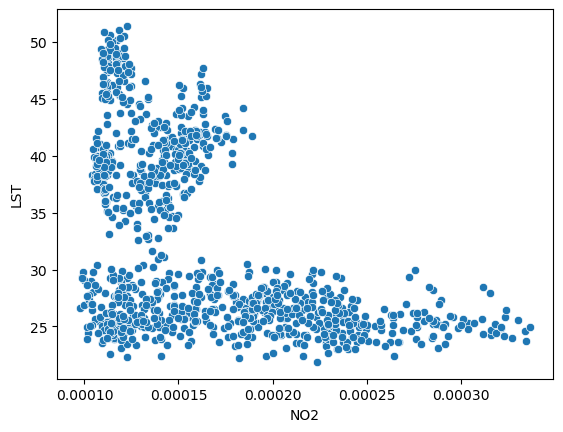

In [26]:
sns.scatterplot(x=df['NO2'],y=df['LST'])

<Axes: xlabel='O3', ylabel='LST'>

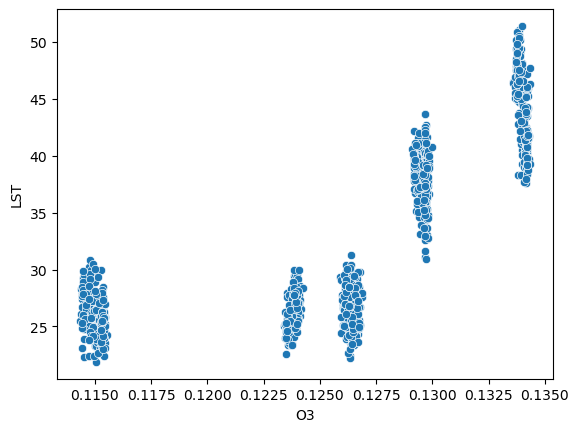

In [28]:
sns.scatterplot(x=df['O3'],y=df['LST'])

## Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

In [30]:
rfr.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [31]:
y_pred_rfr = rfr.predict(X_test)

## Evaluation Metrics

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [34]:
r2_score(Y_test, y_pred_rfr)

0.9276361912359465

In [35]:
mean_absolute_error(Y_test, y_pred_rfr)

1.5414030004213726

In [36]:
mse_rfr=mean_squared_error(Y_test, y_pred_rfr)
mse_rfr

4.221054810696899

In [37]:
RMSE_rfr=np.sqrt(mse_rfr)
RMSE_rfr

2.0545205792828893